<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 7 TIA</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
Técnicas de Inteligencia Artificial - Visión de Máquina</p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> <br>Jose Eduardo Garnica Aza - Johan Sebastian Suarez Sepulveda</p>
<p style="font-size:160%; text-align:center; line-height : 20px; margin-top : 0; "> email: jgarnicaa@unal.edu.co email: jssuarezse@unal.edu.co</p>
<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="Integrantes.png",width=10,height=10>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>4 de mayo de 2022</p>

## Diseño de redes neuronales con libreria SciKit

En este caso se hará una red neuronal de perceptrón multicapa que será capaz de procesar datos de una manera óptima, por una parte siguiendo la guía se implementarán en un vector de características para ver cómo se comporta, posteriormente se comparará con las técnicas vistas en clase para ver cual es más eficiente en términos de precisión, tiempo, entre otros aspectos. 

- Se sigue la guía dada para el desarrollo del taller.

In [1]:
#librerias
%matplotlib inline

from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import numpy as np 
import math as m
import time
import timeit as tm
import cv2 as cv
import pandas as pd
from pylab import plot,subplot,axis,stem,show,figure
from numpy import mean,cov,double,cumsum,dot,linalg,array
import os
from scipy import signal
from scipy import misc

from sklearn import neighbors, datasets

import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
#Importación de data
df = pd.read_csv('Votos.csv') 
print(df.shape)
df.describe().transpose()

(401, 5)


,count,mean,std,min,25%,50%,75%,max
Coordenada X1,401.0,2024.670823,1211.244161,1.0,958.0,1999.0,3177.0,3994.0
Coordenada X2,401.0,2018.985037,1115.930002,82.0,1150.0,1998.0,2971.0,4000.0
Coordenada Y1,401.0,1530.443890,822.224284,21.0,885.0,1530.0,2217.0,2994.0
Coordenada Y2,401.0,1490.860349,885.122769,4.0,706.0,1486.0,2237.0,3000.0
Voto a,401.0,0.498753,0.500623,0.0,0.0,0.0,1.0,1.0


In [3]:
#Normalización de datos
target_column = ['Voto a'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Coordenada X1,401.0,0.506928,0.303266,0.000250,0.239860,0.500501,0.795443,1.0
Coordenada X2,401.0,0.504746,0.278983,0.020500,0.287500,0.499500,0.742750,1.0
Coordenada Y1,401.0,0.511170,0.274624,0.007014,0.295591,0.511022,0.740481,1.0
Coordenada Y2,401.0,0.496953,0.295041,0.001333,0.235333,0.495333,0.745667,1.0
Voto a,401.0,0.498753,0.500623,0.000000,0.000000,0.000000,1.000000,1.0


In [4]:
#Crea el entrenamiento y el test para datasets
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
print(X_train.shape); print(X_test.shape); print(y_train.shape)

(280, 4)
(121, 4)
(280, 1)


In [5]:
#Crea y evalua el modelo de red neuronal
#Para calcular el número de neuronas de la capa oculta, utilizaremos la regla de 2/3, en este caso tenemos 4 entradas y 2
#salidas por lo tanto la regla nos dice que son 8/3 de neuronas o aproximadamente 2 neuronas por capa.
mlp = MLPClassifier(hidden_layer_sizes=(2,2), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

C:\Users\jgarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jgarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
#Matriz de confusión para ver porcentaje de eficacia
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[136   0]
 [  0 144]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       136
           1       1.00      1.00      1.00       144

    accuracy                           1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



Como se ve en la matriz de confusión, la precisión de datos en los 280 que eran de entrenamiento fue de 25% esto es debido a que el modelo de red neuronal no contenía la cantidad de capas y neuronas ocultas necesaria, a continuación se ven los datos de test y se encuentran resultados parecidos.

In [7]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[65  0]
 [ 0 56]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        65
           1       1.00      1.00      1.00        56

    accuracy                           1.00       121
   macro avg       1.00      1.00      1.00       121
weighted avg       1.00      1.00      1.00       121



Para arreglar este problema se varían los parametros de capas ocultas y neuronas ocultas y se vuelve a evaluar cada matriz de confusión, como se ve a continucación

In [8]:
#Crea y evalua el modelo de red neuronal
#Debido a que no funcionó correctamente se varian los parametros hasta que se vea una precisión mayor al 90%
mlp = MLPClassifier(hidden_layer_sizes=(3,3), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

C:\Users\jgarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jgarn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
#Matriz de confusión para ver porcentaje de eficacia
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[136   0]
 [  5 139]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       136
           1       1.00      0.97      0.98       144

    accuracy                           0.98       280
   macro avg       0.98      0.98      0.98       280
weighted avg       0.98      0.98      0.98       280



In [10]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[65  0]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        65
           1       1.00      0.95      0.97        56

    accuracy                           0.98       121
   macro avg       0.98      0.97      0.97       121
weighted avg       0.98      0.98      0.98       121



Finalmente se ve que con 3 capas y 3 neuronas ocultas se obtiene un resultado satisfactorio con una precisión y un puntaje f1 mayor al 90% para datos de entrenamiento como para datos de test.

## Comparativa con métodos usados en clase

- Perceptrón :
    * Función de Activación: Escalón unitario
    * Error: $\varepsilon = \bar{y} - y$,   

[[3701 2298  668 1169]
 [2631 3451 2443  311]
 [ 878  655 2582  396]
 [ 907 1747 2214 1802]]
[[1.]
 [1.]
 [0.]
 [0.]]


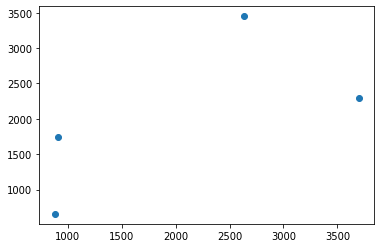

In [37]:
#Definición de los datos a usar
#   Se define unos vectores de caracteristicas similares a los del proyecto 

X = np.array([  [3701,2298,668,1169],
                [2631,3451,2443,311],
                [878,655,2582,396],
                [907,1747,2214,1802] ])


y = np.array([[1.0,1.0,0.0,0.0]]).T

print (X)
print (y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.scatter(X[:,0], X[:,1])


W
[-2.04071528e+21 -3.93069705e+21 -4.98140935e+21 -4.05444914e+21]

Epocas
99


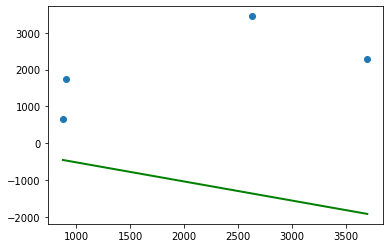

In [38]:
np.random.seed(1)

for j in range(100):
    
    Nerrors = 0
    #=========================
    #PASO 2
    for m in range(X.shape[0]):
        net = np.dot(X[m],W)
    #=========================
    #PASO 3
        if net > 0: y_cal = 1
        else: y_cal = 0
    #=========================
    #PASO 4
        error = y[m] - y_cal
        Delta = error*X[m]
        # update weights
        W = W + Delta.T      
        if error != 0: 
            Nerrors = Nerrors+1
    if Nerrors == 0: 
        break
    #===========================================
    #===========================================

print ("\nW");     print (W)
print ("\nEpocas")
print (j)
y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

plt.scatter(X[:,0], X[:,1])
#plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)

- ADALINE

    * Función de Activación: Identidad o función lineal
    * Error: $\varepsilon = \frac{1}{2}(\bar{y}-y)^2$, 


W0:
[-0.99165956 -0.98559351 -0.99999771 -0.99395335]

------------------
m: 0
y_cal
-7764.955853897622
error
[7765.9558539]
Delta
[574836.0523055  356923.33104513 103753.17020807 181568.04786413]
W
[574835.06064594 356922.34545162 103752.17021036 181567.05391078]

------------------
m: 1
y_cal
3054063964.3031907
error
[-3.05406396e+09]
Delta
[-1.60704846e+11 -2.10791495e+11 -1.49221565e+11 -1.89962779e+10]
W
[-1.60704271e+11 -2.10791138e+11 -1.49221461e+11 -1.89960963e+10]

------------------
m: 2
y_cal
-671978812846094.5
error
[6.71978813e+14]
Delta
[1.17999480e+16 8.80292245e+15 3.47009859e+16 5.32207220e+15]
W
[1.17997872e+16 8.80271166e+15 3.47008367e+16 5.32205320e+15]

------------------
m: 3
y_cal
1.1249873656555756e+20
error
[-1.12498737e+20]
Delta
[-2.04072708e+21 -3.93070586e+21 -4.98144406e+21 -4.05445447e+21]
W
[-2.04071528e+21 -3.93069705e+21 -4.98140935e+21 -4.05444914e+21]


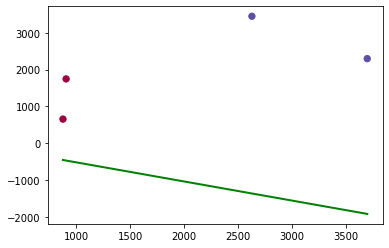

In [39]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# PASO 1
W = 0.02*np.random.random((X.shape[1])) - 1
print ("\nW0:"); print (W)

#a: VALOR CRITICO
a = 0.02
#=========================

for m in range(X.shape[0]):
    print ("\n------------------\nm: %d" %m)
    y_cal = np.dot(X[m],W)
    print ("y_cal"); print (y_cal)

#=========================
#PASO 3
    
    error = y[m] - y_cal
    print ("error");     print (error)
    Delta = a*error*X[m]
    print ("Delta");     print (Delta)

#=========================
#PASO 4

    # update weights
    W = W + Delta
    print ("W");     print (W)

#===========================================
#===========================================

y_min = (-W[0]*x_min - W[2])/W[1]
y_max = (-W[0]*x_max - W[2])/W[1]

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.plot([x_min, x_max], [y_min, y_max], c='g', lw=2)


# Implementacion de una red neuronal de dos capas


In [40]:
# sigmoid function
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))
#==========================

X = np.array([  [3701,2298,668],
                [2631,3451,2443],
                [878,655,2582],
                [907,1747,2214] ])


y = np.array([[1],
             [1],
             [0],
             [0]])
# initialize weights randomly with mean 0
# syn0: First layer of weights, Synapse 0, connecting l0 to l1.
syn0 = 2*np.random.random((X.shape[1],1)) - 1

# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
for iter in range(10000):

    # forward propagation
    # l0: First Layer of the Network, specified by the input data
    # l1: Second Layer of the Network, otherwise known as the hidden layer
    
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    
    # how much did we miss?
    l1_error = y - l1

    # multiply how much we missed by the 
    # slope of the sigmoid at the values in l1
    l1_delta = l1_error * nonlin(l1,True)

    # update weights
    syn0 += np.dot(l0.T,l1_delta)

print ("Output After Training:")
print (l1)


Output After Training:
[[0.]
 [0.]
 [0.]
 [0.]]


C:\Users\jssua\AppData\Local\Temp\ipykernel_11088\298557516.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


# Red neuronal de 3 capas con una capa oculta

In [41]:
import numpy as np

def nonlin(x,deriv=False):
	if(deriv==True):
	    return x*(1-x)

	return 1/(1+np.exp(-x))
    
X = np.array([  [3701,2298,668],
                [2631,3451,2443],
                [878,655,2582],
                [907,1747,2214] ])


y = np.array([[1],
             [1],
             [0],
             [0]])


np.random.seed(1)

# randomly initialize our weights with mean 0
syn0 = 2*np.random.random((3,4)) - 1
syn1 = 2*np.random.random((4,1)) - 1

print (syn0)
print (syn1)

for j in range(60000):

	# Feed forward through layers 0, 1, and 2
    l0 = X
    l1 = nonlin(np.dot(l0,syn0))
    l2 = nonlin(np.dot(l1,syn1))

    # how much did we miss the target value?
    l2_error = y - l2
    
    if (j% 10000) == 0:
        print ("Error:" + str(np.mean(np.abs(l2_error))))
        
    # in what direction is the target value?
    # were we really sure? if so, don't change too much.
    l2_delta = l2_error*nonlin(l2,deriv=True)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    l1_error = l2_delta.dot(syn1.T)
    
    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    l1_delta = l1_error * nonlin(l1,deriv=True)

    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)

print (syn0)
print (syn1)

[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [ 0.75623487]
 [-0.94522481]
 [ 0.34093502]]
Error:0.5624323633315782


C:\Users\jssua\AppData\Local\Temp\ipykernel_11088\1874086635.py:7: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Error:0.3762628786361964
Error:0.37589027067702874
Error:0.3757259302817233
Error:0.3756281747329421
Error:0.37556155286819437
[[-0.16595599  0.44064899 -0.99977125 -0.39533485]
 [-0.70648822 -0.81532281 -0.62747958 -0.30887855]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]]
[[-0.5910955 ]
 [-2.88635884]
 [-0.94522481]
 [-3.30165869]]


# Comparativa

Viendo los resultados obtenidos por estos diferentes modelos de redes neuronales, concuerdan con los obtenidos en el punto en el cual se diseño con Scikit, para las redes de perceptrón y ADALINE de una capa se vió que no fueron capaces de hacer la distinción de forma correcta, se ve que todos los datos los agrupo en la misma clase, por otro lado para la red de dos capas, aunque ejecutó no fue capaz de hacer la distinción de las clases. Finalmente con la red de 3 capas, así como en la hecho con Scikit subió bastante la precisión y tuvo un margen de error mucho menor en comparativa con los anteriores modelos. En conclusión, el uso de una red neuronal de 3 capas es el más óptimo para esta aplicación aunque se recomienda hacerlo con la libreria de Scikit debido a que tiene más robustez.